# Introduction to condition monitoring of roller bearings

This document will outline the basics on how to compute a simple order spectrum.  We assume constant rotational speed.

We first load the dataset we will use and define some key values.

In [102]:
# Initial imports
import numpy as np
import matplotlib.pyplot as plt

# Latex rendering in plots
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.sans-serif": ["Times New Roman"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# set image resolution
dpi = 360


## Load the dataset

In [103]:
filename = 'bearing_fault.dat'

fs = 44e3 # Hz
rpm = 800

data = np.memmap(filename, dtype='float64', mode='readonly')
t = np.arange(len(data)) / fs

## Plot the data

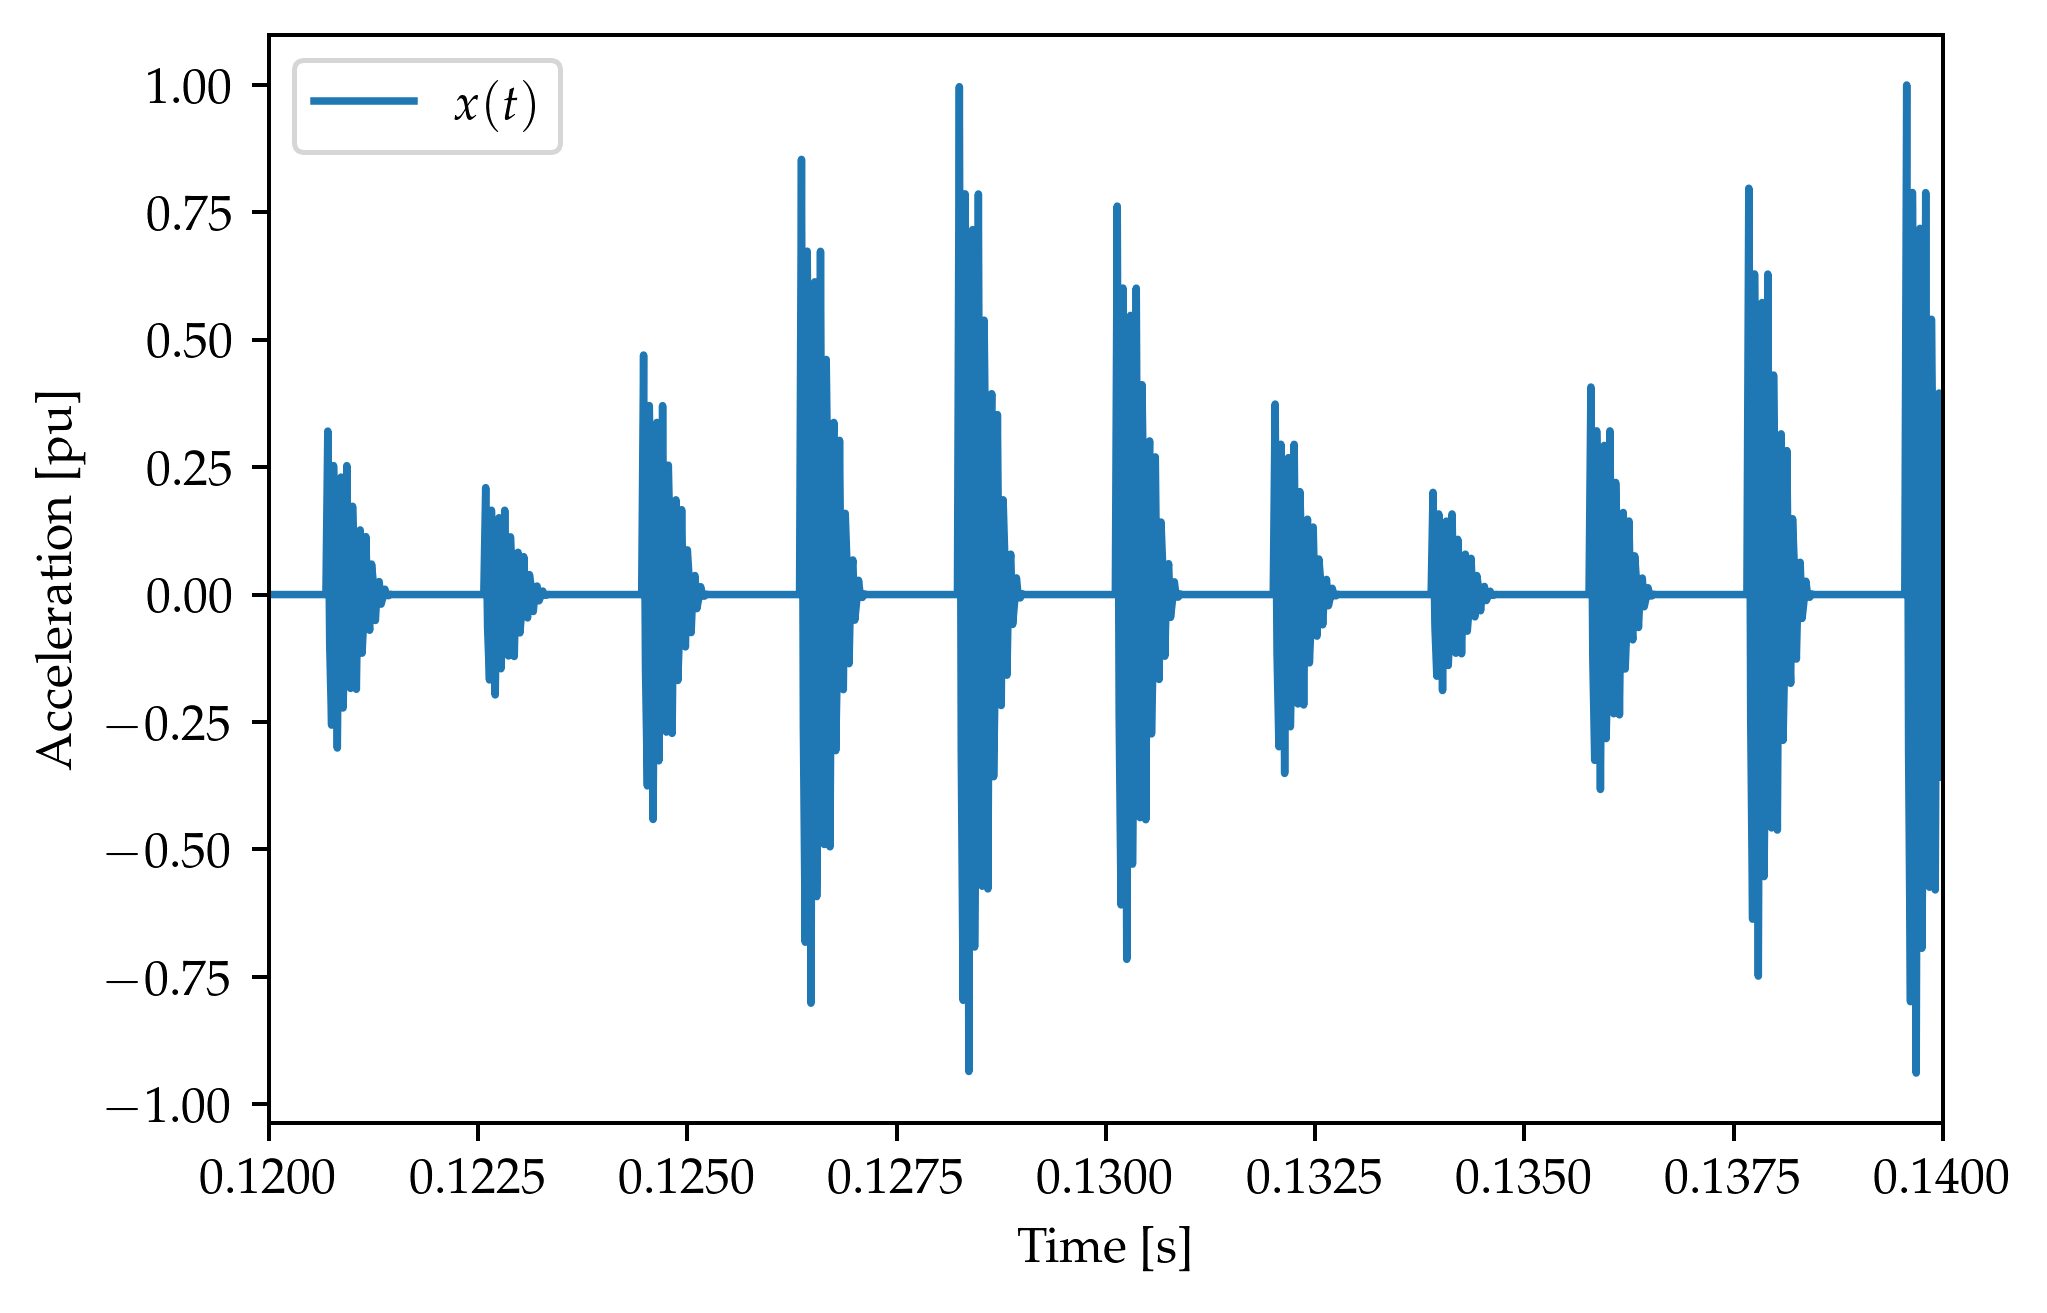

In [104]:
fig, ax = plt.subplots(dpi=dpi)

ax.plot(t, data, label="$x(t)$")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [pu]')

ax.set_xlim([0.12, 0.14])

ax.legend()

fig.savefig('figs/raw.png')


## Analytic signal and envelope

We then calculate the analytic signal using the  scipy function `hilbert`.  This function return the analytic signal, and not the pure hilbert transform.  We then calculate the envelope of the signal.

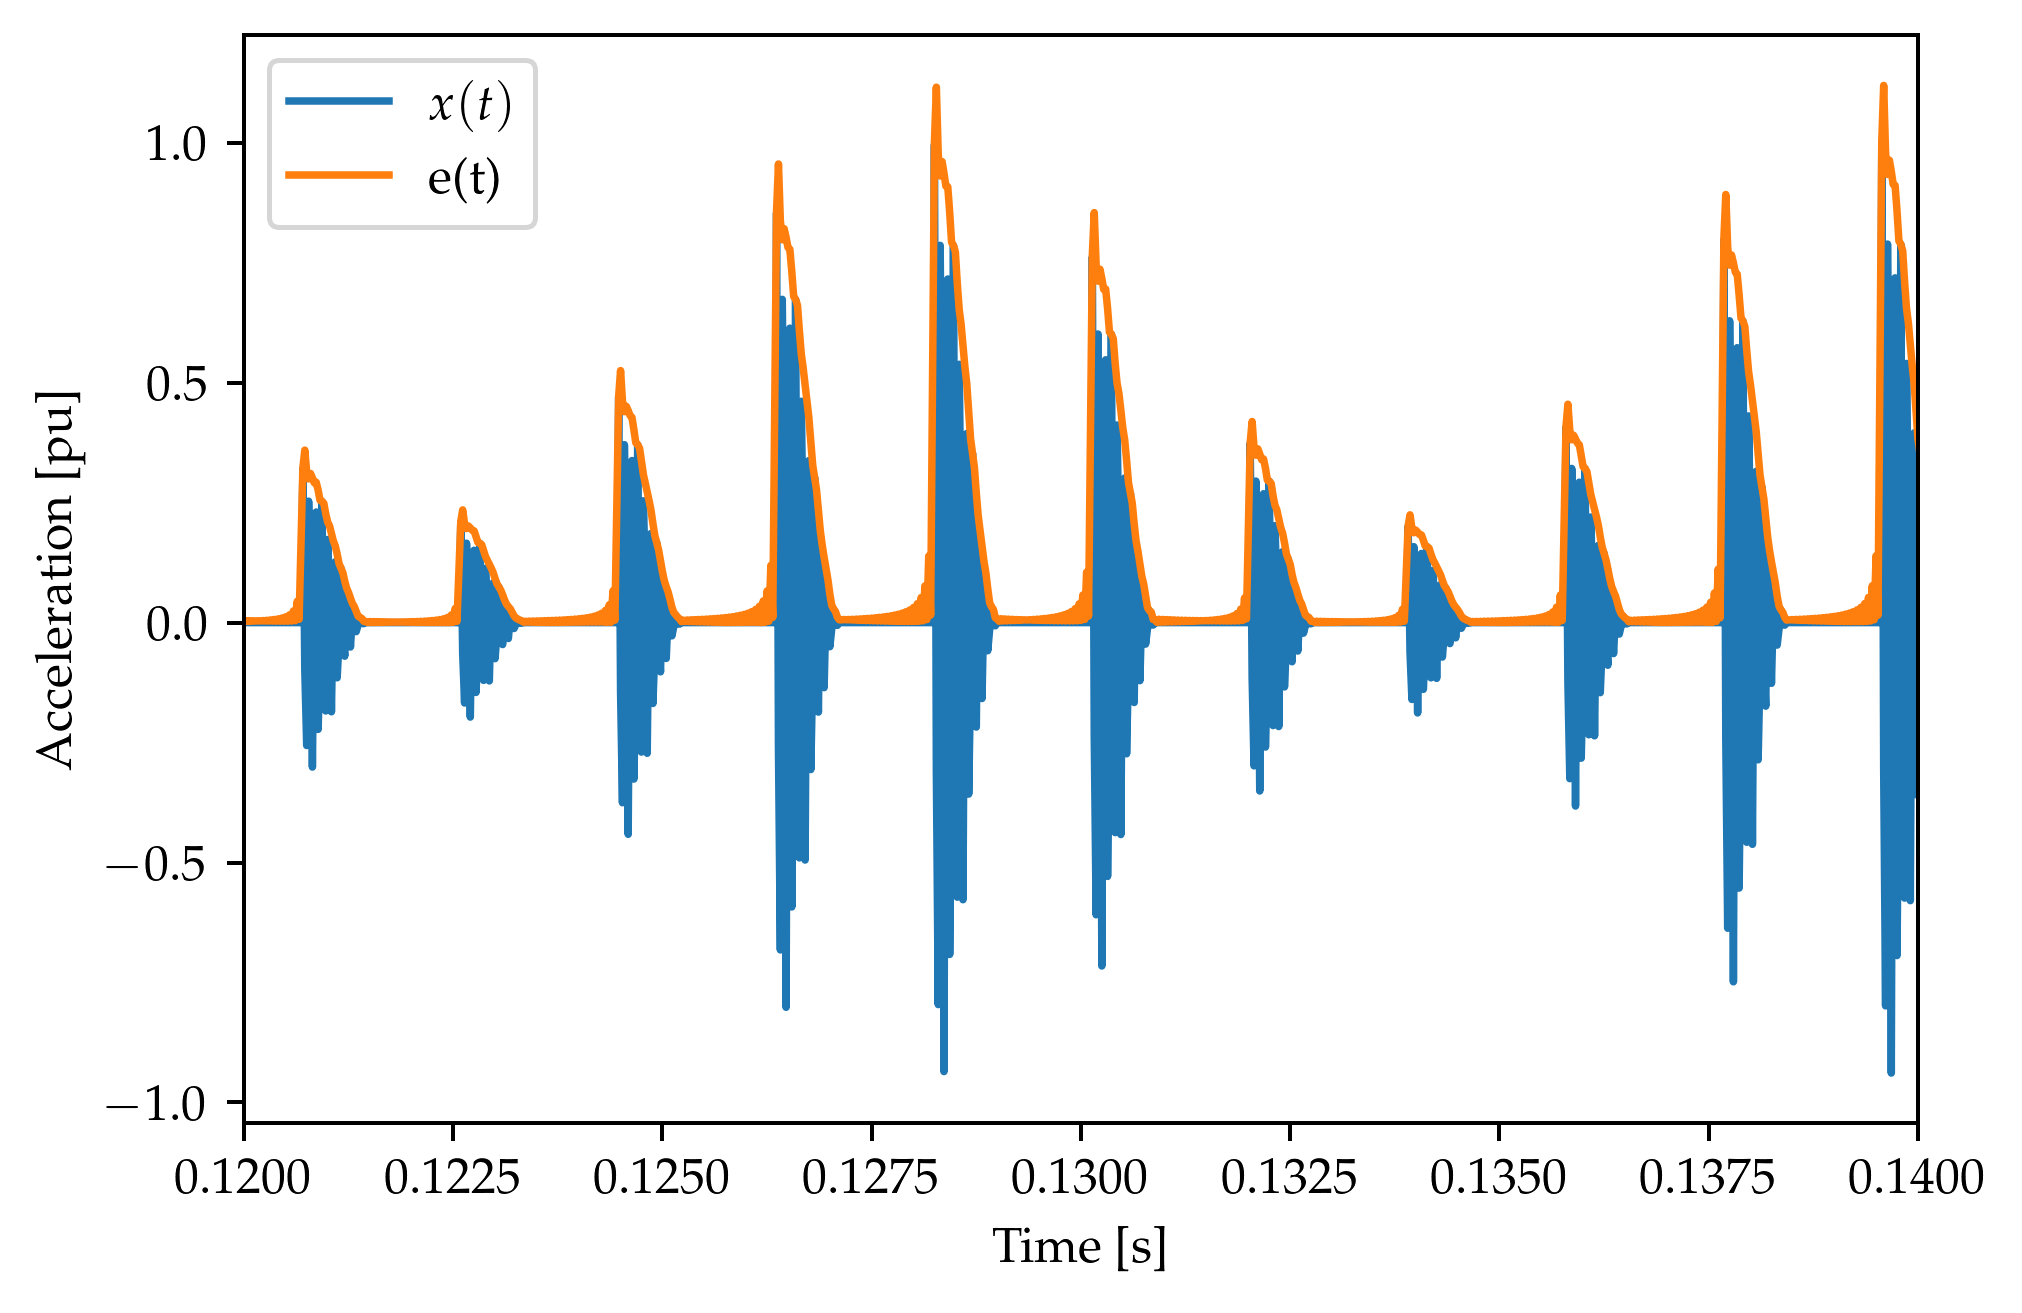

In [105]:
from scipy.signal import hilbert
analytic_signal = hilbert(data)
envelope = abs(analytic_signal)

fig, ax = plt.subplots(dpi=dpi)

ax.plot(t, data, label="$x(t)$")
ax.plot(t, envelope, label="e(t)")

ax.set_xlabel('Time [s]')
ax.set_ylabel('Acceleration [pu]')

ax.set_xlim([0.12, 0.14])

ax.legend()

fig.savefig('figs/raw_w_envelope.png')


## Calculate the spectrum

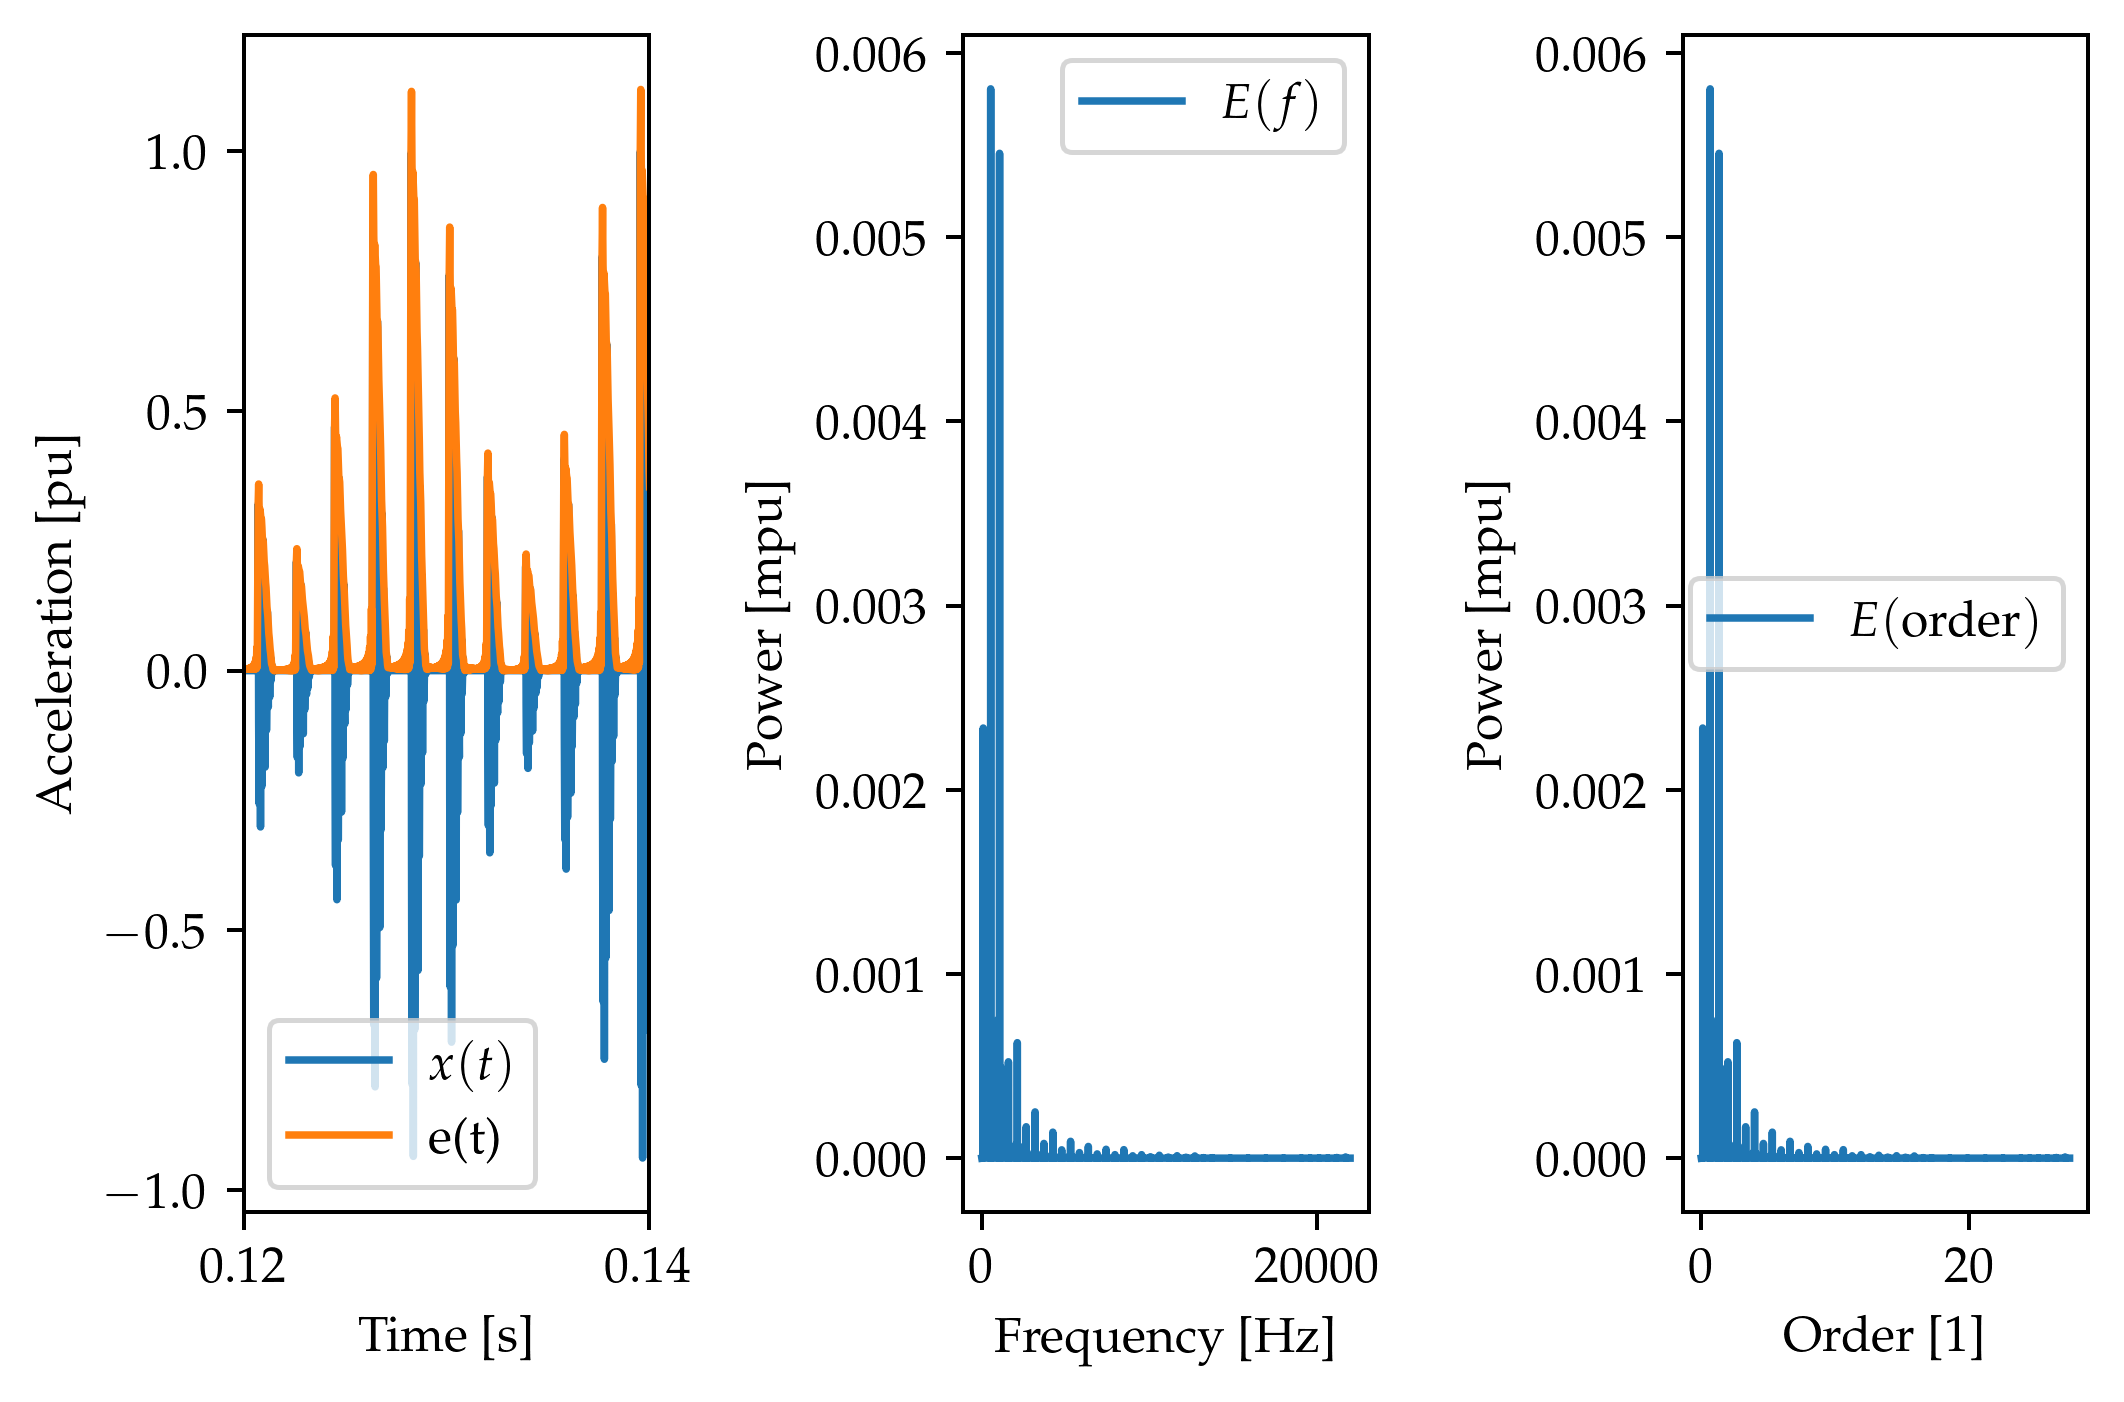

In [110]:
from scipy.signal import periodogram

fig, axs = plt.subplots(nrows=1, ncols=3, dpi=dpi)

# First window: the original signal with envelope

axs[0].plot(t, data, label="$x(t)$")
axs[0].plot(t, envelope, label="e(t)")

axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Acceleration [pu]')

axs[0].set_xlim([0.12, 0.14])

axs[0].legend()

# Second vindow: Envelope spectrum

f, E = periodogram(envelope, fs=fs)

E = E * 1e3

axs[1].plot(f, E, label='$E(f)$')

axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Power [mpu]')

# axs[1].set_xlim([10e3, 15e3])

axs[1].legend()

# Third window: Order spectrum

orders = f / rpm

axs[2].plot(orders, E, label='$E($order$)$')

axs[2].set_xlabel('Order [1]')
axs[2].set_ylabel('Power [mpu]')

# axs[2].set_xlim([10, 20])

axs[2].legend()

fig.tight_layout()

fig.savefig('figs/order_spectrum.png')


### Other useful plots

In [ ]:
# Regular spectrum vs envelope spectrum

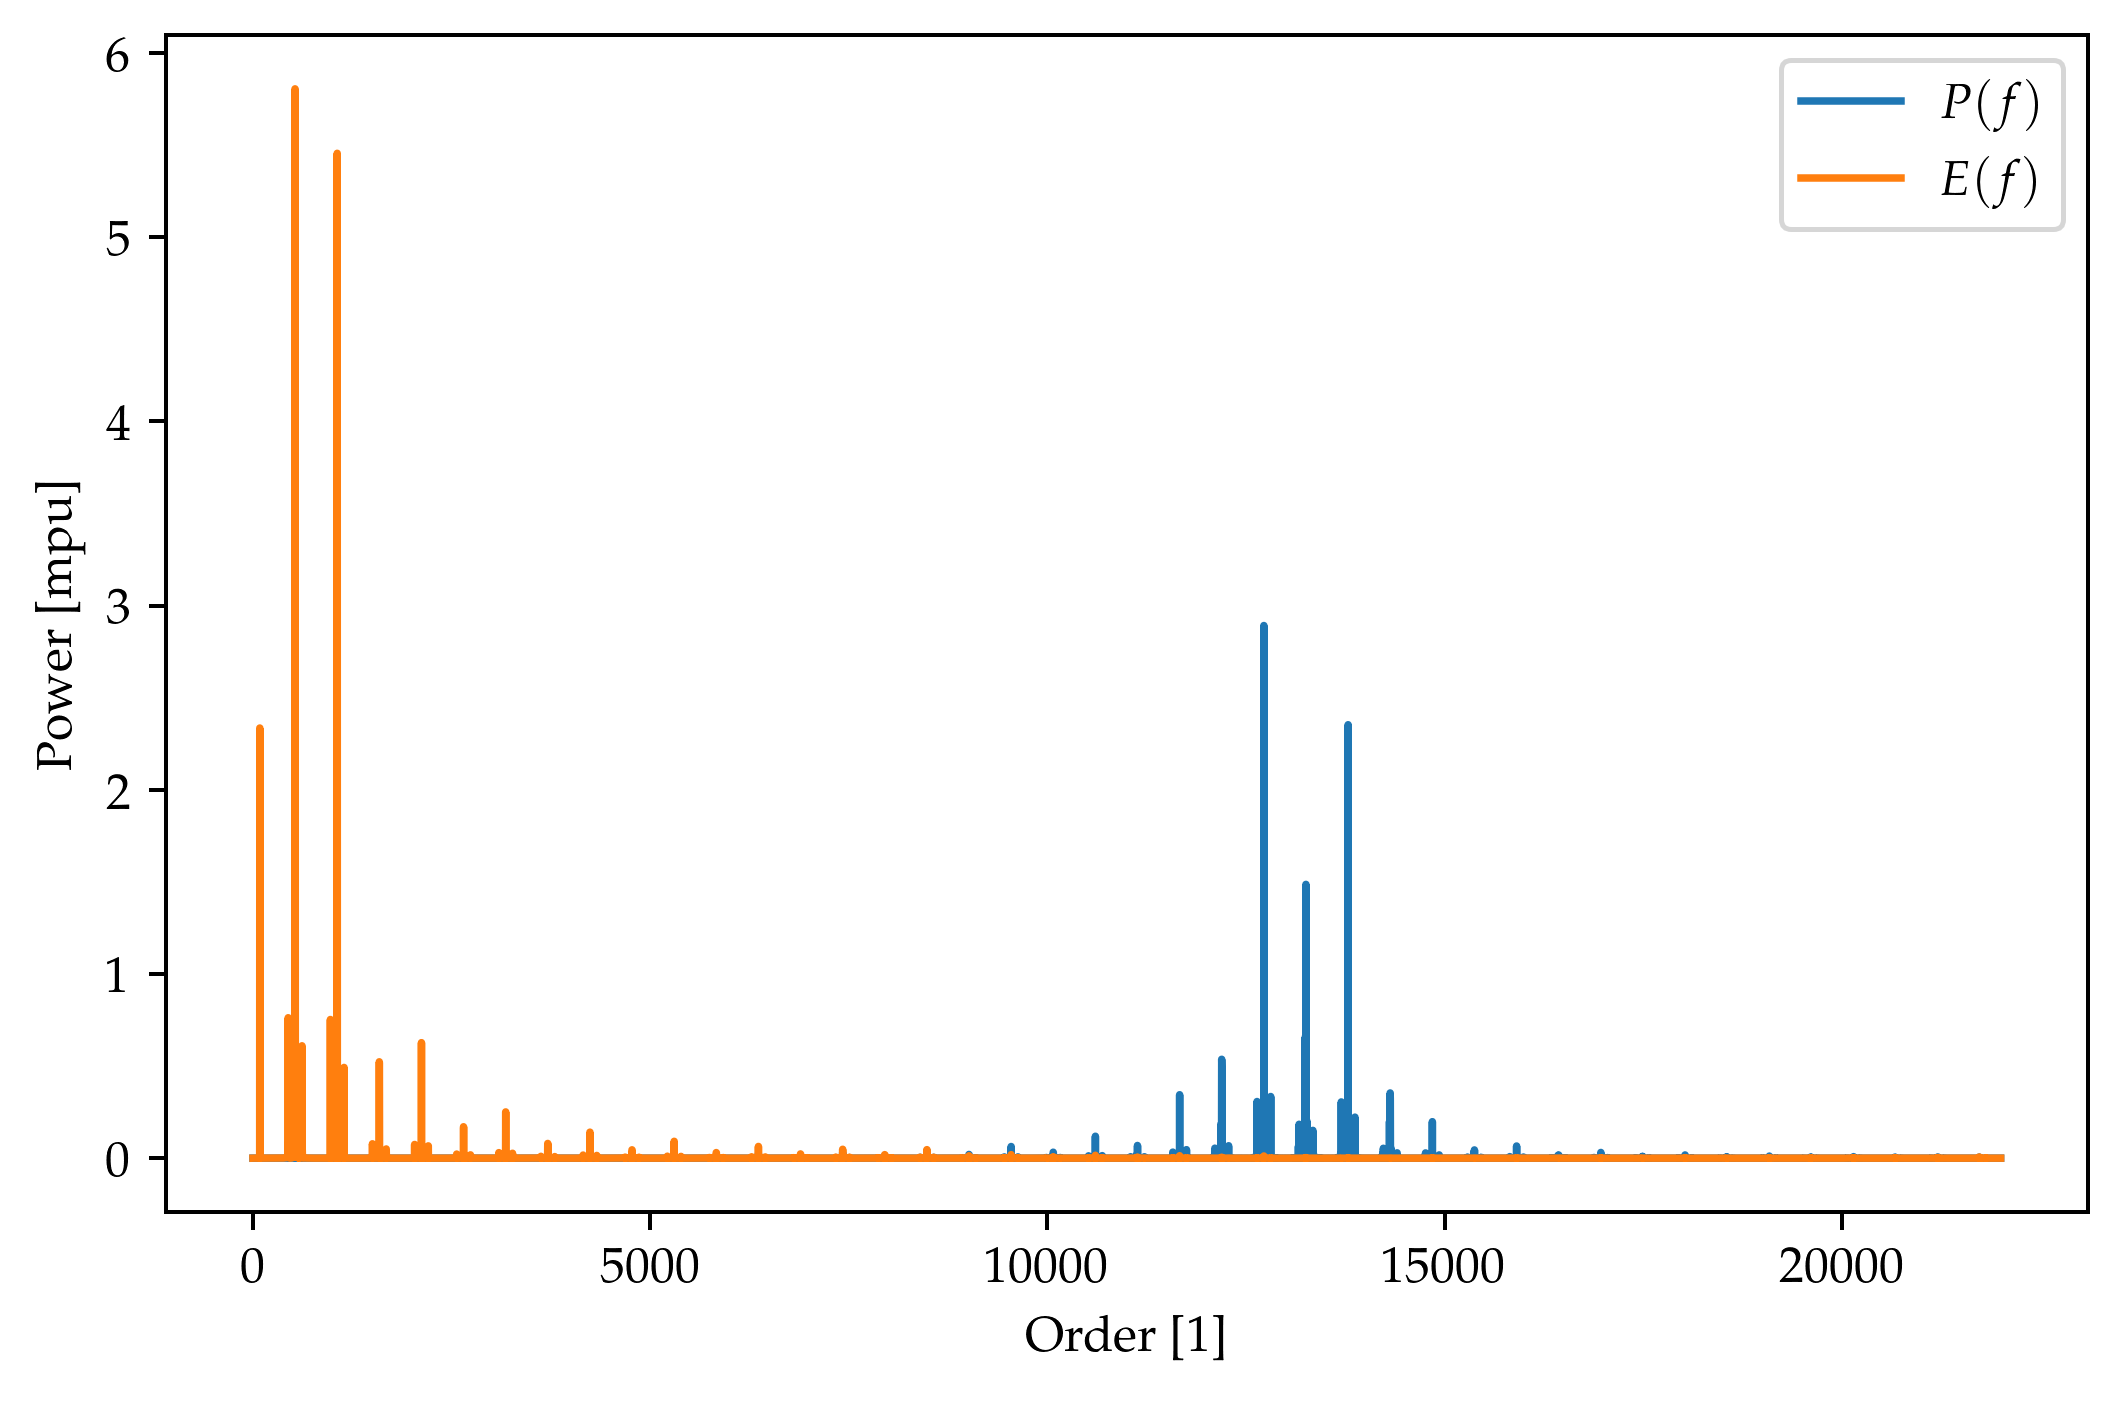

In [112]:
fig, ax = plt.subplots(dpi=dpi)

f, P = periodogram(data, fs=fs)
f, E = periodogram(envelope, fs=fs)

ax.plot(f, P*1e3, label="$P(f)$")
ax.plot(f, E*1e3, label="$E(f)$")

ax.set_xlabel('Order [1]')
ax.set_ylabel('Power [mpu]')

ax.legend()

fig.tight_layout()

fig.savefig('figs/ordinary_and_encelope_spectra.png')
